# Homework Set 2

In [3]:
%pylab inline
import numpy as np
import pandas as pd
import fmt
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import time

# A very useful package that shows the progress of your iteration, 
# Just wrap any iterator with "tqdm(iterator)", and you're done!
# https://github.com/noamraph/tqdm
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days


## Problem 1:

Prove the following properties for the matrix norm, where $A, B$ are matrices, $\boldsymbol u$ is a vector and $b$ is a scaler.
$\renewcommand{bs}{\boldsymbol}$
* $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $
* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

#### (1) $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
#### Solution:
Since $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert A^{-1} \bs u \Vert}{\Vert \bs u\Vert}$  
Let $\bs u^{'} = A^{-1} \bs u$, then we have:  
$\Vert A ^{-1} \Vert = \max_{\bs u^{'} \ne 0} \frac{\Vert \bs u^{'}\Vert}{\Vert A \bs u^{'} \Vert} = \left(\min_{\bs u^{'} \ne 0} \frac{\Vert A \bs u^{'} \Vert}{\Vert \bs u^{'} \Vert}\right)^{-1}$  


#### (2) $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $

#### Solution: 
$ \Vert A\Vert \; \Vert \boldsymbol u\Vert = \max_{\bs i \ne 0} \frac{\Vert A \bs i \Vert}{\Vert \bs i\Vert} \; \Vert u \Vert \ge \frac{\Vert A \bs u \Vert}{\Vert \bs u\Vert} \; \Vert u \Vert \ge \Vert A \boldsymbol u\Vert$

#### (3) $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
#### Solution: 
Obvious from the definition of norm

#### (4) $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $

#### Solution:
$\Vert A+B \Vert = \max_{\bs i \ne 0} \frac{\Vert (A+B) \bs i \Vert}{\Vert \bs i\Vert} = \max_{\bs i \ne 0} \frac{\Vert A\bs i + B\bs i  \Vert}{\Vert \bs i\Vert} \le \max_{\bs i \ne 0} \frac{\Vert A\bs i \Vert + \Vert B\bs i  \Vert}{\Vert \bs i\Vert} \le \max_{\bs p \ne 0} \frac{\Vert A\bs p \Vert }{\Vert \bs p\Vert} + \max_{\bs q \ne 0} \frac{\Vert B\bs q \Vert }{\Vert \bs q\Vert} = \Vert A\Vert + \Vert B\Vert$
#### (5) $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$
#### Solution:
$\Vert AB \Vert = \max_{\bs i \ne 0} \frac{\Vert AB \bs i \Vert}{\Vert \bs i\Vert} \le \max_{\bs i \ne 0} \frac{\Vert A \Vert\Vert B \bs i \Vert}{\Vert \bs i\Vert} \le \Vert A \Vert \; \Vert B \Vert $

## Problem 2



0. Derive the analytical expression of Cholesky decomposition of a 2 dimensional correlation matrix 
$\left(\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right)$, this result is worth memorizing.
1. Implement the recursive Cholesky decomposition algorithm discussed in the class in Python, with the following requirements:
 - use vector/matrix calculation whenever possible, but you obviously should not just call the buildin numpy/scipy functions for Cholesky decomposition 
 - detect and throw exception if the input matrix is not semi-positive definite
3. test your program against the version provided in scipy.linalg, and compare their performance

Hint: for #2, if you don't know what conditoin to catch, you can create a non-SPD matrix and observe how your program can fail. 

## Solution:
#### 1.
Let $ \left[\begin{array} \\ a & 0 \\ b & c \end{array} \right] \left[\begin{array} \\ a & b \\ 0 & c \end{array} \right]= \left[\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right]$  

We got :  
$a = 1, b = \rho, c = \sqrt{1-\rho^{2}}$  

i.e.  
$\left[ \begin{array} \\ 1 & \rho \\ \rho & 1 \end{array}\right] = \left[ \begin{array} \\ 1 & 0 \\ \rho & \sqrt{1-\rho^{2}} \end{array}\right]  \left[ \begin{array} \\ 1 & \rho \\ 0 & \sqrt{1-\rho^{2}} \end{array}\right]$

#### 2.

In [2]:
from numpy.random import random_sample
from numpy.linalg import cholesky

In [3]:
def cholesky_dec(A):
    
    if A[0, 0] < 0:
        raise ValueError("The input matrix is not semi-positive definite")
    
    if len(A) == 1:
        return np.sqrt(A)
    L_11 = np.sqrt(A[0, 0])
    L_21 = A[1:, :1] / L_11
    L_22_tmp = A[1:, 1:] - L_21.dot(L_21.T)

    return np.vstack((np.hstack((L_11, np.zeros(L_21.shape[0]))),
                 np.hstack((L_21, cholesky_dec(L_22_tmp)))))

#### 3

#### Correctness:

In [4]:
# I wrap the iteration with tqdm.
# tqdm is a very useful package that shows the progress of your iteration. 
# https://github.com/noamraph/tqdm

def correctness_test():
    dim = np.arange(1, 500, 20)
    for i in tqdm(dim):
        A = random_sample((i, i))
        A = A.dot(A.T)
        a = cholesky_dec(A)
        b = cholesky(A)
        if not np.allclose(cholesky_dec(A), cholesky(A)):
            print "Different result detected"
            return
    print "Results in accordance."

correctness_test()

Results in accordance.


#### Performance:

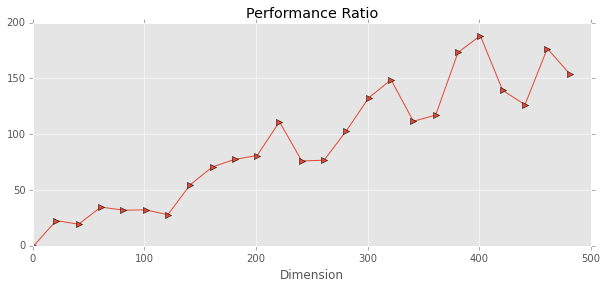

In [5]:
dim = np.arange(1, 500, 20)
ratio_list = []
for i in tqdm(dim):
    A = random_sample((i, i))
    A = A.dot(A.T)
    start1 = time.time()
    cholesky_dec(A)
    end1 = time.time()
    start2 = time.time()
    cholesky(A)
    end2 = time.time()
    ratio = (end1 - start1) / (end2 - start2)
    ratio_list.append(ratio)
plt.figure(1, figsize=(10,4))
plt.plot(dim, ratio_list, '->')
plt.title('Performance Ratio')
plt.xlabel("Dimension")
plt.grid(True)
plt.show()

## Problem 3

Take the portfolio and historical stock time series of the Dow Jones industrial average (DJIA) index:

In [4]:
djiaurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djia.csv"
djia = pd.read_csv(djiaurl, index_col=[0])

#fmt.displayDF(djia)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)


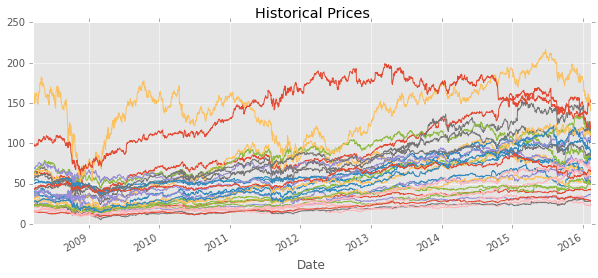

In [5]:
def download_hist_prices(tickers) : # we download the stock prices from Yahoo!Finance
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    closeKey = 'Adj Close'
    dfs = []

    for ticker in tqdm(tickers):
        try :
            url = base_url + ticker
            dfs.append(pd.read_csv(url, parse_dates=[0], index_col=[0]).rename(columns={closeKey:ticker})[ticker])
        except Error:
            print "error in " + ticker
            continue

    return pd.concat(dfs, axis=1, join='inner')

histprice = download_hist_prices(djia.index).sort()
histprice.plot(legend=False, title='Historical Prices', figsize=(10, 4));

1. estimate the historical correlation and covariance matrix of the DJIA constiuents' daily returns, 
2. estimate historical excess return of individual stocks (assume the historical risk free rate is 3%)
3. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
4. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
5. compute the condition number of the covariance matrix, and comments the numerical stability of the optimal portfolio. You can use the python function ```numpy.linalg.norm``` for matrix norm.
2. take the daily return time series, and split them into two segments: one only contains odd days' returns and the other only contains even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segements, and compare their results. Please comment on which of the two metric, return or volatility, can be reliably estimated from historical data. 
6. [Extra credit] Please repeat the analysis using weekly returns and comment on whether the results are materially different
6. [Extra credit]: use numerical simulation to show that the optimal portfolio from #3 indeed has the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. ```numpy.random``` is a random number generator package in Python.
7. [Extra credit, open question] comment on what practical implication you might infer from the results in 8.

Hints and requirements: 
* as discussed in class, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into singular matrix when reverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and he doesn't understand what is a singular matrix that can't be inverted).
* on part 5, you can use array slice to split btw even and odd elements, see the following example:

## Solution:
#### 1.

In [9]:
log_price = histprice.apply(np.log)
hist_ret = log_price.diff()[1:]
hist_cov = hist_ret.cov() * 252
hist_corr = hist_ret.corr()

In [10]:
hist_cov

,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,0.0557,0.0606,0.0300,0.0449,0.0554,0.0440,0.0445,0.0244,0.0494,0.0399,...,0.0378,0.0323,0.0259,0.0437,0.0451,0.0409,0.0299,0.0373,0.0217,0.0467
AXP,0.0606,0.1778,0.0513,0.0736,0.0901,0.0674,0.0723,0.0359,0.0811,0.0576,...,0.0671,0.0533,0.0385,0.0816,0.0680,0.0697,0.0481,0.0803,0.0314,0.0796
T,0.0300,0.0513,0.0495,0.0358,0.0418,0.0404,0.0390,0.0233,0.0405,0.0373,...,0.0329,0.0293,0.0245,0.0375,0.0343,0.0360,0.0391,0.0329,0.0213,0.0403
BA,0.0449,0.0736,0.0358,0.0930,0.0642,0.0514,0.0518,0.0292,0.0569,0.0471,...,0.0480,0.0361,0.0283,0.0480,0.0556,0.0497,0.0316,0.0451,0.0249,0.0570
CAT,0.0554,0.0901,0.0418,0.0642,0.1228,0.0672,0.0636,0.0310,0.0760,0.0579,...,0.0534,0.0418,0.0293,0.0549,0.0624,0.0516,0.0389,0.0558,0.0255,0.0649
CVX,0.0440,0.0674,0.0404,0.0514,0.0672,0.0842,0.0515,0.0299,0.0590,0.0672,...,0.0414,0.0399,0.0307,0.0525,0.0486,0.0527,0.0360,0.0458,0.0249,0.0555
CSCO,0.0445,0.0723,0.0390,0.0518,0.0636,0.0515,0.0992,0.0281,0.0584,0.0462,...,0.0481,0.0358,0.0289,0.0506,0.0508,0.0466,0.0355,0.0486,0.0260,0.0559
KO,0.0244,0.0359,0.0233,0.0292,0.0310,0.0299,0.0281,0.0388,0.0298,0.0275,...,0.0263,0.0240,0.0213,0.0299,0.0282,0.0327,0.0222,0.0212,0.0174,0.0314
DD,0.0494,0.0811,0.0405,0.0569,0.0760,0.0590,0.0584,0.0298,0.0948,0.0525,...,0.0498,0.0407,0.0312,0.0545,0.0542,0.0497,0.0376,0.0516,0.0252,0.0613
XOM,0.0399,0.0576,0.0373,0.0471,0.0579,0.0672,0.0462,0.0275,0.0525,0.0684,...,0.0378,0.0365,0.0294,0.0464,0.0435,0.0456,0.0332,0.0393,0.0236,0.0492


In [11]:
hist_corr

,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,1.0000,0.6090,0.5712,0.6244,0.6702,0.6427,0.5988,0.5244,0.6798,0.6458,...,0.5391,0.5731,0.5885,0.5940,0.7452,0.4753,0.5673,0.4795,0.4674,0.6682
AXP,0.6090,1.0000,0.5467,0.5725,0.6096,0.5511,0.5444,0.4325,0.6248,0.5224,...,0.5355,0.5298,0.4898,0.6208,0.6289,0.4536,0.5107,0.5779,0.3783,0.6374
T,0.5712,0.5467,1.0000,0.5282,0.5359,0.6257,0.5575,0.5317,0.5915,0.6406,...,0.4976,0.5523,0.5904,0.5406,0.6024,0.4435,0.7874,0.4480,0.4869,0.6119
BA,0.6244,0.5725,0.5282,1.0000,0.6011,0.5809,0.5391,0.4870,0.6061,0.5907,...,0.5299,0.4962,0.4979,0.5047,0.7111,0.4470,0.4639,0.4490,0.4146,0.6313
CAT,0.6702,0.6096,0.5359,0.6011,1.0000,0.6611,0.5758,0.4497,0.7039,0.6316,...,0.5130,0.4996,0.4492,0.5029,0.6943,0.4038,0.4963,0.4829,0.3699,0.6251
CVX,0.6427,0.5511,0.6257,0.5809,0.6611,1.0000,0.5633,0.5233,0.6605,0.8851,...,0.4804,0.5766,0.5684,0.5807,0.6537,0.4981,0.5552,0.4791,0.4362,0.6462
CSCO,0.5988,0.5444,0.5575,0.5391,0.5758,0.5633,1.0000,0.4535,0.6022,0.5608,...,0.5135,0.4761,0.4920,0.5152,0.6297,0.4063,0.5047,0.4679,0.4193,0.5995
KO,0.5244,0.4325,0.5317,0.4870,0.4497,0.5233,0.4535,1.0000,0.4914,0.5333,...,0.4500,0.5097,0.5819,0.4871,0.5577,0.4555,0.5040,0.3271,0.4477,0.5380
DD,0.6798,0.6248,0.5915,0.6061,0.7039,0.6605,0.6022,0.4914,1.0000,0.6524,...,0.5446,0.5531,0.5436,0.5677,0.6873,0.4429,0.5471,0.5088,0.4151,0.6725
XOM,0.6458,0.5224,0.6406,0.5907,0.6316,0.8851,0.5608,0.5333,0.6524,1.0000,...,0.4862,0.5844,0.6029,0.5696,0.6487,0.4782,0.5676,0.4556,0.4575,0.6350


#### 2.

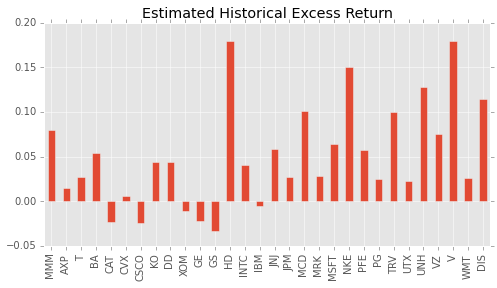

In [12]:
r0 = 0.03
excess_ret = np.mean(hist_ret) * 252 - r0
excess_ret.plot(kind='bar', figsize=(8, 4), title="Estimated Historical Excess Return")

#### 3.
The optimal portfolio's is unreasonable, a lot of individual positions are around $\pm 100\%$, which is impossible to achieve in the real world.

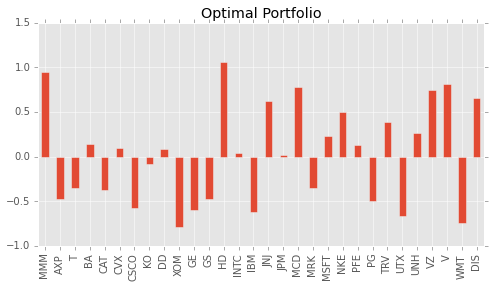

In [13]:
from numpy.linalg import inv

cov_inv = inv(hist_cov)
w = cov_inv.dot(excess_ret.T) / (excess_ret.T.dot(cov_inv).dot(excess_ret))
w = pd.Series(w, index=excess_ret.index)
w = w / np.sum(w)
w.plot(kind="bar", figsize=(8, 4), title="Optimal Portfolio")

#### 4.
According to the Black–Litterman model, implied returns can be computed as follows:

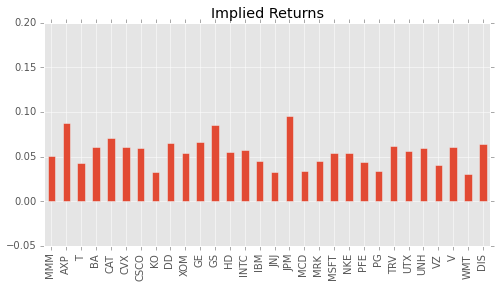

In [15]:
weights = djia['Weights']
lmb = excess_ret.dot(weights)
var_port = weights.dot(hist_cov).dot(weights)
ir = lmb * hist_cov.dot(weights) / var_port

ir.plot(kind='bar', figsize=(8, 4), title='Implied Returns', ylim=[-0.05, 0.2])

According to the histogram and the density plot below, we can see that the implied returns tend to be more close to the mean while historical estimate tend to be spread out.

My personal view is that the implied return is a better forecast, since the Black-Litterman model has the ability to adjust equilibrium market returns by incorporating views into it and therefore to get optimal portfolio reflecting those views. 

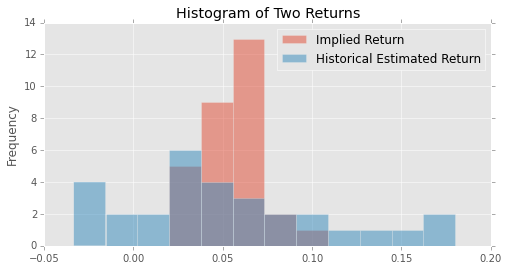

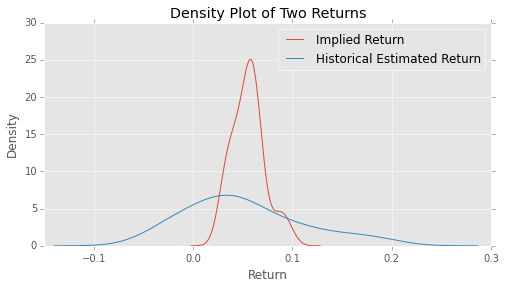

In [16]:
df1 = pd.DataFrame(np.array([ir, excess_ret]).T, columns=['Implied Return', \
    'Historical Estimated Return'])

df1.plot(kind='hist', alpha=0.5, bins=12, figsize=(8, 4), title="Histogram of Two Returns")
df1.plot(kind='kde', figsize=(8, 4), legend='best', title="Density Plot of Two Returns")
plt.xlabel("Return")

#### 5.

The conditional numbers shows that the optimal portfolio is stable.

In [17]:
from numpy.linalg import norm
k_1 = norm(hist_cov, ord=1) * norm(inv(hist_cov), ord=1)
k_2 = norm(hist_cov, ord=2) * norm(inv(hist_cov), ord=2)
k_inf = norm(hist_cov, ord=inf) * norm(inv(hist_cov), ord=inf)
print "Condition number by L1 norm is: ", k_1
print "Condition number by L2 norm is: ", k_2
print "Condition number by L-infinity norm is: ", k_inf

Condition number by L1 norm is:  435.336498401
Condition number by L2 norm is:  180.430429566
Condition number by L-infinity norm is:  435.336498401


#### 6.
From both the histogram and the density plot below we can see that the return metric can be more reliably estimated than the vol.

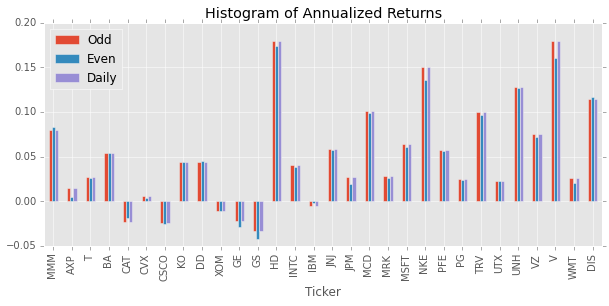

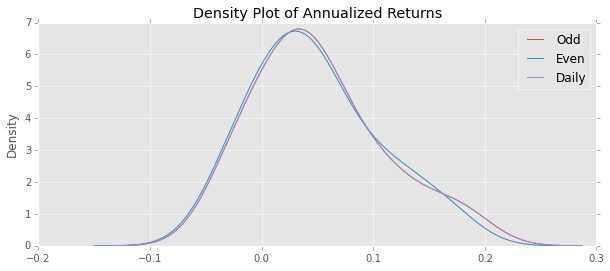

In [18]:
odd = histprice[0::2]
even = histprice[1::2]

log_price_odd = odd.apply(np.log)
log_price_even = even.apply(np.log)

hist_ret_odd = log_price_odd.diff()[1:]
hist_ret_even = log_price_even.diff()[1:]

hist_cov_odd = hist_ret_odd.cov() * (252 / 2)
hist_cov_even = hist_ret_even.cov() * (252 / 2)

r1 = np.mean(hist_ret_odd) * (252 / 2) - r0
r2 = np.mean(hist_ret_even) * (252 / 2) - r0

vol1 = pd.Series(hist_cov_odd.as_matrix().diagonal(), index=hist_cov_odd.index)
vol2 = pd.Series(hist_cov_even.as_matrix().diagonal(), index=hist_cov_even.index)
vol_daily = pd.Series(hist_cov.as_matrix().diagonal(), index=hist_cov.index)

df2 = pd.DataFrame(np.array([r1, r2, excess_ret]).T, columns=['Odd', 'Even', 'Daily'], index=djia.index)

df2.plot(kind='bar', title='Histogram of Annualized Returns', figsize=(10, 4))
df2.plot(kind='kde', title='Density Plot of Annualized Returns', figsize=(10, 4))

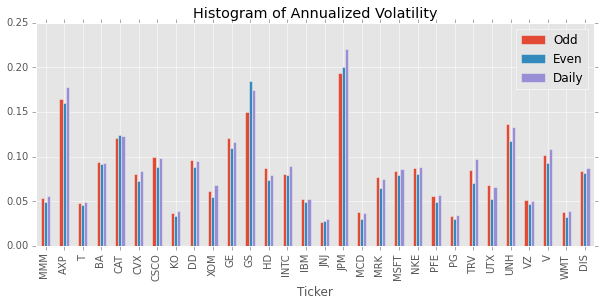

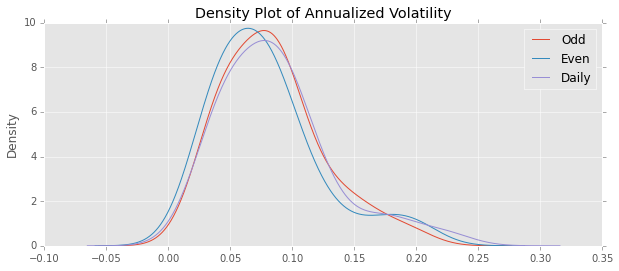

In [19]:
df3 = pd.DataFrame(np.array([vol1, vol2, vol_daily]).T, columns=['Odd', 'Even', 'Daily'], index=djia.index)
df3.plot(kind='bar', title='Histogram of Annualized Volatility', figsize=(10, 4))
df3.plot(kind='kde', title='Density Plot of Annualized Volatility', figsize=(10, 4))

#### 7.

Weekly returns shows that both the annualized returns and annualized vol are more unstable compared to the original daily data, especiall the vol estimates.

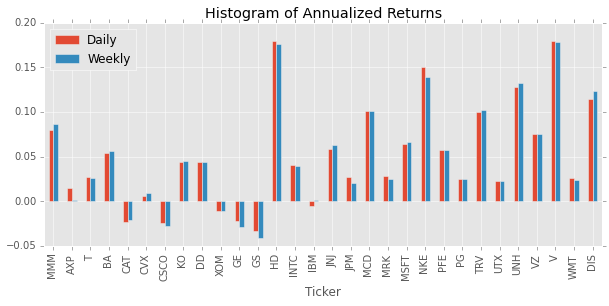

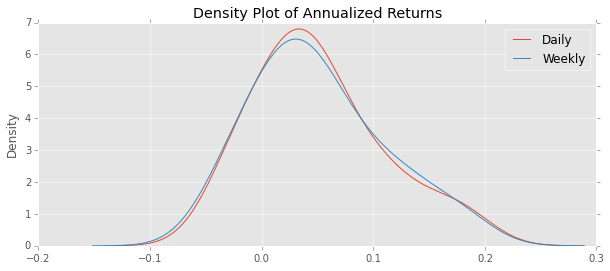

In [20]:
weekly_price = histprice[histprice.index.weekday == 0]

log_price_weekly = weekly_price.apply(np.log)
hist_ret_weekly = log_price_weekly.diff()[1:]
hist_cov_weekly = hist_ret_weekly.cov() * (252 / 5)

r5 = np.mean(hist_ret_weekly) * (252 / 5) - r0
vol_weekly = pd.Series(hist_cov_weekly.as_matrix().diagonal(), index=hist_cov_weekly.index)

df_weekly = pd.DataFrame(np.array([excess_ret, r5]).T, columns=['Daily', 'Weekly'], index=djia.index)                                                               
df_weekly.plot(kind='bar', title='Histogram of Annualized Returns', figsize=(10, 4))
df_weekly.plot(kind='kde', title='Density Plot of Annualized Returns', figsize=(10, 4))

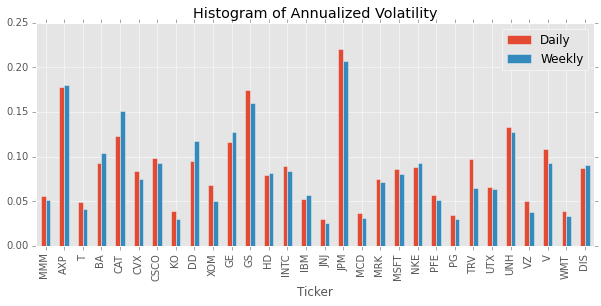

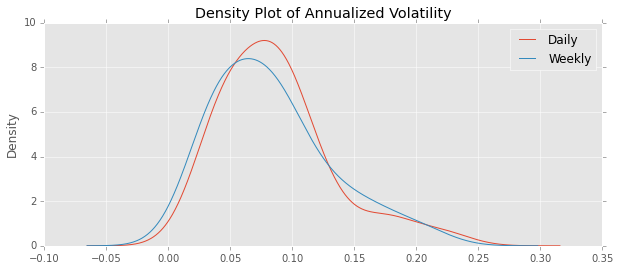

In [21]:
df_weekly_vol = pd.DataFrame(np.array([vol_daily, vol_weekly]).T, \
                columns=['Daily', 'Weekly'], index=djia.index)
df_weekly_vol.plot(kind='bar', title='Histogram of Annualized Volatility', figsize=(10, 4))
df_weekly_vol.plot(kind='kde', title='Density Plot of Annualized Volatility', figsize=(10, 4))

####  8.

In [22]:
sr_opt = excess_ret.dot(w) / np.sqrt(w.dot(hist_cov).dot(w))
print "Sharpe ratio of the optimal portfolio: ", sr_opt

Sharp ratio of the optimal portfolio:  1.53327360569


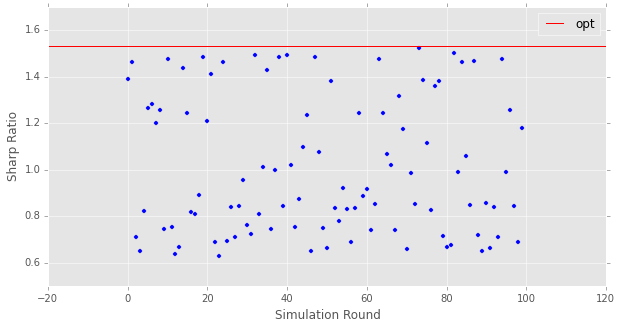

In [55]:
N = 100
sr_sim_list = []
for i in xrange(100):
    w_pert = w + 0.01 * np.random.uniform(30)
    sr_sim = excess_ret.dot(w_pert) / np.sqrt(w_pert.dot(hist_cov).dot(w_pert))
    sr_sim_list.append(sr_sim)

plt.figure(figsize=(10, 5))
plt.scatter(range(N), sr_sim_list)
plt.xlabel("Simulation Round")
plt.ylabel("Sharpe Ratio")
plt.ylim([0.5, 1.7])
plt.axhline(sr_opt, color='r', label="opt")
plt.legend()

#### 9.

The results above indicates that first of all, the optimal portfolio has the highest sharpe ratio. It also indicates that small perturbation may lead to big change in sharpe ratio therefore the optimal sharpe ratio tend to be difficult to achieve.